# Binary-Tree data structure and algorithms implementation 
> A comprehensive library of Binary-Tree data structure, algorithms implementation and visualisations using graphviz and in ASCII style

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [python, testing, continuous-integration]
- image: images/BT/thumbnail.jpeg
- search_exclude: false

Recently I started learning standard algorithms from a theoretical standpoint i.e. their design, their complexities, and analysis of their complexities from the **Introduction to Algorithms** book by *Thomas H.Cormen et.al*. While I am learning I thought of also making it practical and implement all the details around the topic that I am learning. This post and the last one too are the result of this motivation. While the previous post details the automated testing that I had setup as a Github action to perform continuous integration, this post details the library itself with detailed examples. Each example is followed by an explanation of the and tries to details all the features of the library.

To follow along with the rest of the code, the libary can be easily installed using pip as follows-
```shell
pip install binary-tree-logicatcore
```
---

To Begin with, we need to import *BT* (Binary-Tree) and *Node* classes to work with.

In [1]:
from binary_tree.binary_tree import BT, Node

A tree is composed of nested nodes with each node having two childrens, namely 'left' and 'right' which are also nodes. Hence the **nesting** continues. A node accepts a value to store and another two optional nodes to act as its left and right children. Below is an example of a node with '1' as the value and with two childrens *left* and *right* each with a value of '2' and '3', which are also nodes.

In [2]:
Node(1, Node(2), Node(3))

  1  
 / \ 
2   3

A binary tree consists of such nodes nested allowing the tree to grow in height/depth with the addition of nodes. Below an example showing one way of defining a binary tree very similar to the previous example. A binary tree class accepts a single root node which may or may not have left and right childrens. In the following example, the root node has two childrens and the two childrens have 4 childrens, two respectively. The last 4 childrens do not have any childrens and hence are called **leafs** generally (end points of the tree)

In [3]:
tree = BT(Node(1, Node(2, Node(4), Node(5)), Node(3, Node(6), Node(7))))

The created tree can be visualised in two ways-
1. Using graphviz
2. In ASCII style

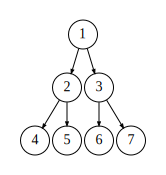

In [4]:
tree.graphviz()

In [5]:
tree.ASCII()

              1              
       _______|______              
       |            |              
       2             3       
    ___|___       ___|___       
    |     |       |     |       
    4      5      6      7    



The main properties of the binary tree can be quickly and easily summarised by calling the properties method as follows.

In [6]:
tree.properties()

Total number of elements in the tree are: 7
Total number of nodes are: 3
Total number of leafs are: 4
The depth of the tree is: 2
The maximum value in the tree is: 7
The minimum value in the tree is: 1

              1              
       _______|______              
       |            |              
       2             3       
    ___|___       ___|___       
    |     |       |     |       
    4      5      6      7    



The second way of creating a similar tree is through using python **lists**, which is quick and enables building much deeper trees. But, certain level of control over deciding which nodes must have left children or right children or both or none is lost in doing so.

In [7]:
list_tree = BT([1,2,3,4,5,6,7])

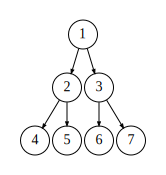

In [8]:
list_tree.graphviz()

In [9]:
list_tree.ASCII()

              1              
       _______|______              
       |            |              
       2             3       
    ___|___       ___|___       
    |     |       |     |       
    4      5      6      7    



In [10]:
list_tree.properties()

Total number of elements in the tree are: 7
Total number of nodes are: 3
Total number of leafs are: 4
The depth of the tree is: 2
The maximum value in the tree is: 7
The minimum value in the tree is: 1

              1              
       _______|______              
       |            |              
       2             3       
    ___|___       ___|___       
    |     |       |     |       
    4      5      6      7    



As it can be seen that the result is same in this case i.e. the resulting tree created by manually nesting the nodes and the resulting tree created using lists both are same.

# Tree related algorithms

Since a binary tree is not meant to be simple data structure, there are some algorithms that have evloved around it which reduce the number of comuptations required, such as **heapsort** which takes $O(nlog(n))$ time.

Like the tree in real world, there are some binary trees which are unique because of it's characteristics. Two such properties are-
1. Max-Heap: The property that the parent node always has a larger value than its childrens through out the tree
2. Min-Heap: The property that the parent node always has a smaller value than its childrens through out the tree

The tree object comes with methods which when called automatically adjusts the positions of nodes in order to maintain these properties. Below we will look at an example on how to use these methods in order to alter the tree to maintain the properties desired.

## Max-Heap and Min-Heap

In [11]:
unordered_tree = BT([1,10,2,9,3,8,4,7,5,6])

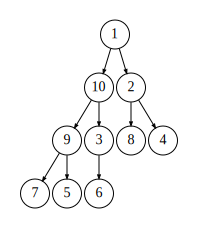

In [12]:
unordered_tree.graphviz()

As it is evident that the tree doesn't satisfy the property, now we will use the *max_heapify()* method and *min_heapify()* method to change the tree and check again

In [13]:
unordered_tree.max_heapify() # inplace change

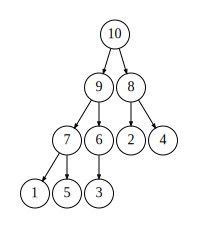

In [14]:
unordered_tree.graphviz()

In this new tree graph we can see that the parent node value is always **larger** than the value of it's childrens, grand-childrens, great-grand-childrens and so on....

In [15]:
unordered_tree.min_heapify() # inplace change

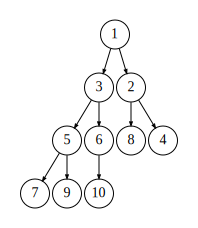

In [16]:
unordered_tree.graphviz()

In this tree graph we can now see that the parent node value is always **smaller** than the value of it's childrens, grand-childrens, great-grand-childrens and so on....

## Heap Sort

On the look of it, heap sort results look and feel to the user as the results of any other type of sorting method. The main difference however comes in the implementation and the time complexity.

In [17]:
from binary_tree.heap_sort import heap_sort_asc, heap_sort_desc
import numpy as np

In [18]:
test_list = np.random.randint(0, 100, size=(1, 20)).tolist()[0]
print("Random list of 20 numbers:", test_list)
print("Heap sort in ascending order:", heap_sort_asc(test_list))
print("Heap sort in descending order:", heap_sort_desc(test_list))

Random list of 20 numbers: [95, 53, 52, 59, 86, 32, 26, 27, 64, 64, 76, 41, 27, 83, 57, 0, 73, 35, 19, 76]
Heap sort in ascending order: [0, 19, 26, 27, 27, 32, 35, 41, 52, 53, 57, 59, 64, 64, 73, 76, 76, 83, 86, 95]
Heap sort in descending order: [95, 86, 83, 76, 76, 73, 64, 64, 59, 57, 53, 52, 41, 35, 32, 27, 27, 26, 19, 0]


## Priority queues

A priority queue is a data structure for maintaining a set S of elements, each with an associated value called a key. And as with heaps, priority queues come in two forms: max-priority queues and min-priority queues.

A max-priority queue supports the following operations:

* INSERT(S, x) inserts the element x into the set S, which is equivalent to the operation $S = S \cup {x}$
* MAXIMUM(S) returns the element of S with the largest key.
* EXTRACT-MAX(S) removes and returns the element of S with the largest key.
* INCREASE-KEY(S, x, k) increases the value of element x’s key to the new value k, which is assumed to be at least as large as x’s current key value.

And a min-priority queue supports the following operations:

* INSERT(S, x) inserts the element x into the set S, which is equivalent to the operation $S = S \cup {x}$
* MINIMUM(S) returns the element of S with the smallest key.
* EXTRACT-MIN(S) removes and returns the element of S with the smallest key.
* DECREASE-KEY(S, x, k) decreases the value of element x’s key to the new value k, which is assumed to be at least as small as x’s current key value.

In [19]:
from binary_tree.priority_queue import MaxPQueue, MinPQueue

## Max-Priority Queue

To explain a max-priority queue let us consider a simple sentence and since we know that the word order in English language is important, this means that each word has certain priority. We will try to use the max-priority queue to correctly order a set of words and punctuations based on their priorities.

### Maximum and Extract-Max functionality

Initially here we want to correctly order 'Hello', '!' and 'World' words and a punctuation in the correct order for which we assign corresponding priority values as a 1-to-1 mapping to the 'MaxPQueue' class. Then we check which word has the highest priority and then the order of all the objects(words, punctuations) in the queue.

In [20]:
max_queue = MaxPQueue([3,1,2],['Hello', '!', 'World'])

In [21]:
max_queue.max()

'Hello'

In [22]:
while len(max_queue.objects) > 0:
    print(max_queue.get_max(), end=' ')

Hello World ! 

### Insert functionality
Mid way we realise that we forgot to add some details and would like add them, for this purpose we use the *insert* functionality to add an adjective that qualifies the noun in sentence i.e. 'World' with a priority that if less than that of 'Hello' but more than that of 'World'

In [23]:
max_queue = MaxPQueue([3,1,2],['Hello', '!', 'World'])
max_queue.heap_insert('beautiful', 2.5)
while len(max_queue.objects) > 0:
    print(max_queue.get_max(), end=' ')

Hello beautiful World ! 

### Increase-Key functionality

While adding certain details (events/tasks/objects) to the queue, if we happen to assign an incorrect key or if the priorities have changed (for example in a real world production factory where the product being produced needs to adapt to the market), we can use the *increase_key* functionality as follows. Here we try to add the words 'Max' and 'says' but do it incorrectly thus we decide to correct it using the *increase_key* method

In [24]:
max_queue = MaxPQueue([3,1,2],['Hello', '!', 'World'])

max_queue.heap_insert('Max', 2.5)
max_queue.heap_insert('says', 2.8)

max_queue.increase_key('Max', 5)
max_queue.increase_key('says', 4)

while len(max_queue.objects) > 0:
    print(max_queue.get_max(), end=' ')

Max says Hello World ! 

## Min-Priority Queue

A min-priority queue can also be logically understood using a simple example where the day activities are ordered based on *time* and since time is linear in nature the smallest must come first and the largest later.

### Minimum and Extract-Min functionality

In the following example certain day activities are listed along with the ideal time for them to take place in a 24 hr format.

In [25]:
min_queue = MinPQueue([9,19,13,22,6],['Breakfast', 'Dinner', 'lunch', 'sleep', 'wakeup'])

In [26]:
min_queue.min()

'wakeup'

In [27]:
while len(min_queue.objects) > 0:
    print(min_queue.get_min(), end=' -> ')

wakeup -> Breakfast -> lunch -> Dinner -> sleep -> 

### Insert functionality
While planning we forget to include *studies* so like in the previous case where we added an adjective, here to we can insert a 'study' task into the queue

In [28]:
min_queue = MinPQueue([9,19,13,22,6],['Breakfast', 'Dinner', 'lunch', 'sleep', 'wakeup'])
min_queue.heap_insert('study', 10)
while len(min_queue.objects) > 0:
    print(min_queue.get_min(), end=' -> ')

wakeup -> Breakfast -> study -> lunch -> Dinner -> sleep -> 

### Decrease-Key functionality
Like in the previous case of max-priority queue while inserting certain tasks like to 'brush' teeths and to 'play' because in the former we made a mistake and in the later we didn't realise the day to be holiday.

In [29]:
min_queue = MinPQueue([9,19,13,22,6],['Breakfast', 'Dinner', 'lunch', 'sleep', 'wakeup'])

min_queue.heap_insert('brush', 10)
min_queue.heap_insert('play', 17)

min_queue.decrease_key('brush', 7)
min_queue.decrease_key('play', 10)

while len(min_queue.objects) > 0:
    print(min_queue.get_min(), end=' -> ')

wakeup -> brush -> Breakfast -> play -> lunch -> Dinner -> sleep -> 